# Air Quality Data Exploration

This notebook explores the air quality data from the CAMS dataset and visualizes residential EC in PM2.5 across Western Europe.

In [10]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from air_quality_map import load_air_quality_data, plot_air_quality_map

# Set better visualization defaults
plt.style.use('ggplot')
sns.set(font_scale=1.2)

## Loading the Air Quality Data

Let's load the air quality data using the function from our module.

In [11]:
# Load the data
df = load_air_quality_data()

# Display the first few rows
df.head()

Loading cached DataFrame from ../data/pm25_data.json


,lat,lon,pm25
0,35.05,-9.95,0.006281
1,35.05,-9.85,0.006536
2,35.05,-9.75,0.006739
3,35.05,-9.65,0.006952
4,35.05,-9.55,0.007256


## Exploring the Dataset

Let's examine the basic statistics and distribution of the PM2.5 data.

In [12]:
# Basic statistics of the PM2.5 data
print("Dataset shape:", df.shape)
print("\nBasic statistics for PM2.5 values:")
df['pm25'].describe()

Dataset shape: (87500, 3)

Basic statistics for PM2.5 values:


count    87500.000000
mean         0.160841
std          0.239817
min          0.000842
25%          0.026024
50%          0.061324
75%          0.193764
max          2.887229
Name: pm25, dtype: float64

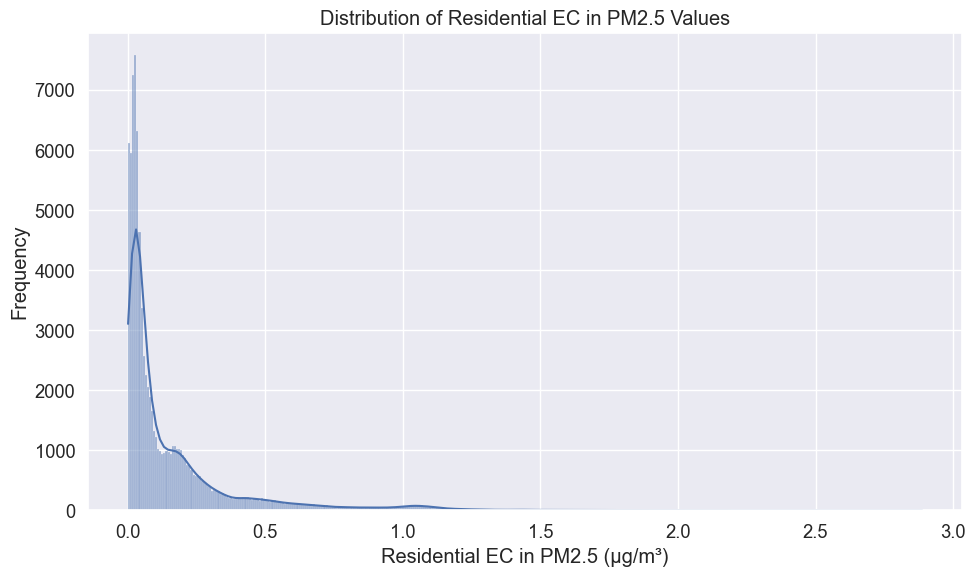

In [13]:
# Visualize the distribution of PM2.5 values
plt.figure(figsize=(10, 6))
sns.histplot(df['pm25'], kde=True)
plt.title('Distribution of Residential EC in PM2.5 Values')
plt.xlabel('Residential EC in PM2.5 (µg/m³)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Identifying Hotspots

Let's identify areas with the highest PM2.5 values.

In [14]:
# Find the top 10 locations with highest PM2.5 values
top_pm25 = df.sort_values('pm25', ascending=False).head(10)
print("Top 10 locations with highest PM2.5 values:")
top_pm25

Top 10 locations with highest PM2.5 values:


,lat,lon,pm25
52799,50.05,19.95,2.887229
52800,50.05,20.05,2.726140
53491,50.25,19.15,2.456375
53490,50.25,19.05,2.447380
53839,50.35,18.95,2.437716
53489,50.25,18.95,2.384573
52801,50.05,20.15,2.379270
52798,50.05,19.85,2.379209
53840,50.35,19.05,2.351236
53841,50.35,19.15,2.330188


## Visualizing the Air Quality Map

Now let's visualize the air quality map using our plotting function.

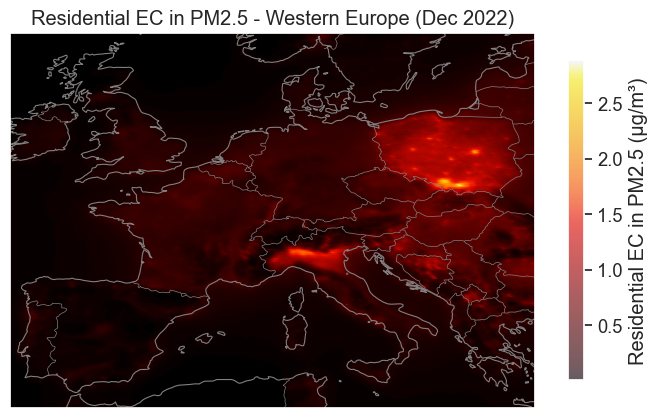

In [15]:
# Plot the air quality map
plt = plot_air_quality_map(df)
plt.show()

## Conclusion

This analysis has explored the residential EC within PM2.5 data across Western Europe. The visualizations reveal spatial patterns in air quality, with certain regions showing notably higher concentrations.

In [16]:
# Save the final visualization to the plots directory
import os
os.makedirs("plots", exist_ok=True)
plt = plot_air_quality_map(df)
plt.savefig(os.path.join("plots", "air_quality_map.png"), dpi=300, bbox_inches="tight")
plt.close()
print("Map saved to plots/air_quality_map.png")

Map saved to plots/air_quality_map.png
